In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import openml
import seaborn as sn

In [8]:
def obter_dataset(id):


    dataset = openml.datasets.get_dataset(id, download_data=True, download_qualities=True, download_features_meta_data=True)
    
    X, y, _, attrs = dataset.get_data(dataset_format="array", target=dataset.default_target_attribute)
    
    df = pd.DataFrame(X, columns=attrs)
    df['target'] = y
    # converter:
    #   0 -> -1
    #   1 -> 1
    df['target'] = 2*y-1
    # erase rows with NaN values
    df = df.dropna(how='any', axis=0)

    csv_path = f'{id}.csv'
    df.to_csv(csv_path, index= False)
    
    return df

In [9]:
list_num_dataset_id = [1464, 1067, 1467, 1504,1494, 1068]
dataframes = {}
for dataset_id in list_num_dataset_id:
    df = obter_dataset(dataset_id)
    dataframes[dataset_id] = df

C:\Users\ricar\AppData\Local\Temp\ipykernel_8112\912023531.py:6: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, attrs = dataset.get_data(dataset_format="array", target=dataset.default_target_attribute)
C:\Users\ricar\AppData\Local\Temp\ipykernel_8112\912023531.py:6: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, attrs = dataset.get_data(dataset_format="array", target=dataset.default_target_attribute)
C:\Users\ricar\AppData\Local\Temp\ipykernel_8112\912023531.py:6: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure

In [10]:
import numpy as np
from sklearn.model_selection import KFold



def run_cv(X,y,algs,nfolds=10, means_only=False):
    results = {}
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=1111)
    for algo_name, algo in algs:
        results[algo_name] = []
        sum_fold = 0 
        print("\n")
        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            algo.fit(X_train, y_train)
            y_pred = algo.predict(X_test)
            results[algo_name].append(accuracy_score(y_test, y_pred))
            sum_fold += results[algo_name][-1]
            #print(f"Fold {fold} for {algo_name}: {results[algo_name][-1]}")
        print(f"Mean for {algo_name}: {sum_fold/nfolds}")
    results_df = pd.DataFrame.from_dict(results)
    if not means_only:
        return results_df
    else:
        results_means = {}
        for algo_name, algo in algs:
            results_means[algo_name] = [np.mean(results[algo_name])]
        return pd.DataFrame.from_dict(results_means)

In [11]:
import matplotlib.pyplot as plt

def plot_cv(results_cv,metric='Accuracy', title="Cross-validation results for multiple algorithms in a single task"):
    fig, ax = plt.subplots()
    ax.boxplot(results_cv)
    ax.set_xticklabels(results_cv.columns)
    ax.set_ylabel(metric)
    ax.set_title(title)
    plt.show()

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from algorithms.adaboost import AdaBoost
from sklearn.metrics import accuracy_score

models = [
    ("AdaBoost ficheiro", AdaBoost()),
    ("AdaBoost Check Outliers 3", AdaBoost(check_outliers=True)),
    ("AdaBoost biblioteca", AdaBoostClassifier(algorithm='SAMME'))
]

for id in list_num_dataset_id:
    print(f"\nDataset {id}:")
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    results = run_cv(X, y, models, means_only=True)


Dataset 1464:
Mean for AdaBoost ficheiro: 0.7700180180180181
Mean for AdaBoost Check Outliers 3: 0.770018018018018

Mean for AdaBoost biblioteca: 0.7833513513513515

Dataset 1067:

Mean for AdaBoost ficheiro: 0.8501715188445047

Mean for AdaBoost Check Outliers 3: 0.8416361995034981

Mean for AdaBoost biblioteca: 0.8473166328142631

Dataset 1467:

Mean for AdaBoost ficheiro: 0.9055555555555557

Mean for AdaBoost Check Outliers 3: 0.9092592592592592

Mean for AdaBoost biblioteca: 0.8981481481481483

Dataset 1504:

Mean for AdaBoost ficheiro: 0.8650092519164685

Mean for AdaBoost Check Outliers 3: 0.828437747819191

Mean for AdaBoost biblioteca: 0.9546576790906689

Dataset 1494:

Mean for AdaBoost ficheiro: 0.8341509433962264

Mean for AdaBoost Check Outliers 3: 0.8341060197663971

Mean for AdaBoost biblioteca: 0.8313117699910151

Dataset 1068:

Mean for AdaBoost ficheiro: 0.9278378378378379

Mean for AdaBoost Check Outliers 3: 0.9233415233415233

Mean for AdaBoost biblioteca: 0.9305241

In [19]:
results

,AdaBoost ficheiro,AdaBoost Check Outliers 3,AdaBoost biblioteca
0,0.927838,0.923342,0.930524


Outliers em V1:


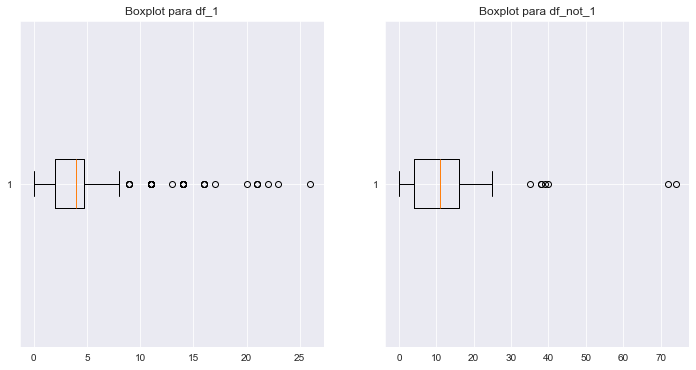

Outliers em V2:


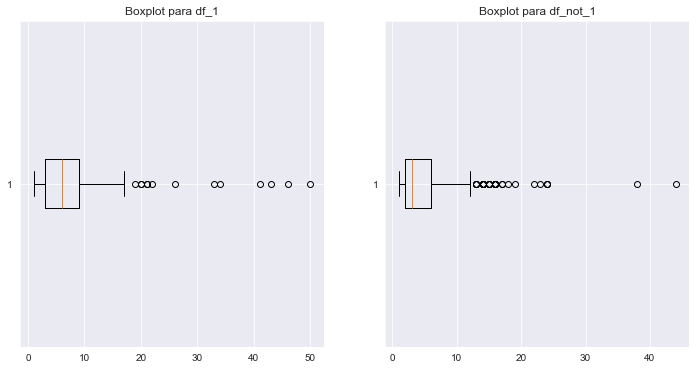

Outliers em V3:


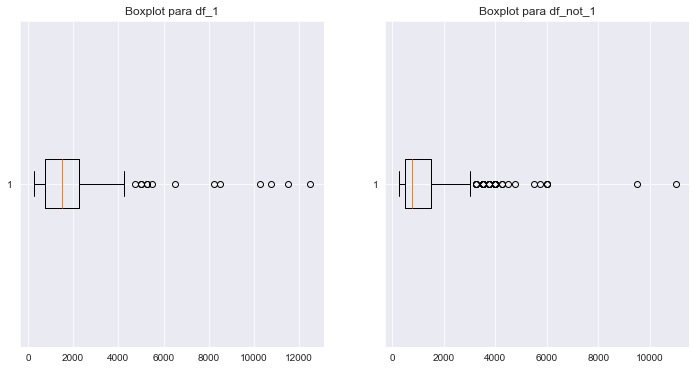

Outliers em V4:


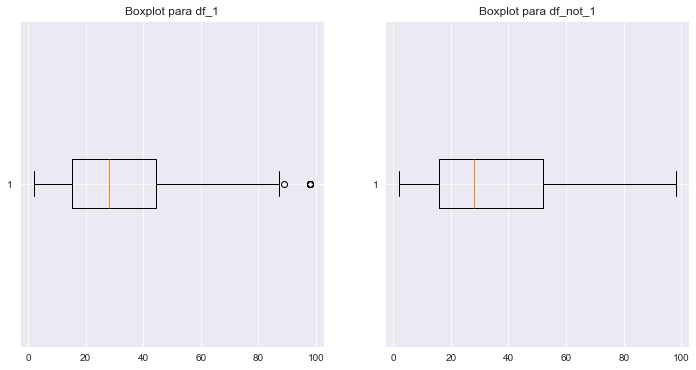

Total de outliers: 38


'\nQuando estamos a analisar os outliers fará sentido separar as classes (ver o boxplot para cada classe separadamente) ou é melhor analisar todas as classes juntas?\nA análise de outliers deve ser feita para cada classe separadamente. Se você analisar todas as classes juntas,\n você pode acabar considerando valores que são normais para uma classe como outliers, simplesmente porque eles são incomuns em relação a outra classe.\n'

In [13]:
# Análise dos outliers de cada dataset 
'''
O valor que você deve colocar no limite depende do que você considera um outlier. No código que você forneceu, você está usando a regra do escore z para detectar outliers. Especificamente, você está considerando qualquer valor que seja mais de 3 desvios padrão da média como um outlier.  

O valor de 3 é comumente usado na regra do escore z porque corresponde a um nível de confiança de cerca de 99,7% em uma distribuição normal. Isso significa que, em uma distribuição normal, esperamos que cerca de 99,7% dos valores estejam dentro de 3 desvios padrão da média.

'''
df_1 = dataframes[1464][dataframes[1464]['target'] == 1]
df_1 = df_1.drop(columns=['target'], axis=1)
df_not_1 = dataframes[1464][dataframes[1464]['target'] == -1]
df_not_1 = df_not_1.drop(columns=['target'], axis=1)

n_outliers = 0
limite = 3

for coluna in df_1.columns:
    data_plot_1 = df_1[coluna]
    data_plot_not_1 = df_not_1[coluna]

    print(f'Outliers em {coluna}:')
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Plot para a classe 1
    axs[0].boxplot(df_1[f'{coluna}'], vert=False)
    axs[0].set_title('Boxplot para df_1')
    
    # Plot para a classe -1
    axs[1].boxplot(df_not_1[f'{coluna}'], vert=False)
    axs[1].set_title('Boxplot para df_not_1')
    
    plt.show()
    
    z_scores_1 = np.abs((data_plot_1 - data_plot_1.mean()) / data_plot_1.std())
    outliers_1 = z_scores_1 > limite
    n_outliers += outliers_1.sum()

    z_scores_not_1 = np.abs((data_plot_not_1 - data_plot_not_1.mean()) / data_plot_not_1.std())
    outliers_not_1 = z_scores_not_1 > limite
    n_outliers += outliers_not_1.sum()
        
    

print(f'Total de outliers: {n_outliers}')  


'''
Quando estamos a analisar os outliers fará sentido separar as classes (ver o boxplot para cada classe separadamente) ou é melhor analisar todas as classes juntas?
A análise de outliers deve ser feita para cada classe separadamente. Se você analisar todas as classes juntas,
 você pode acabar considerando valores que são normais para uma classe como outliers, simplesmente porque eles são incomuns em relação a outra classe.
'''